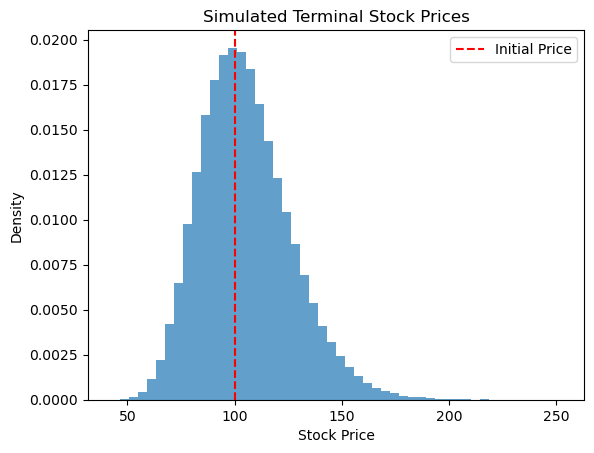

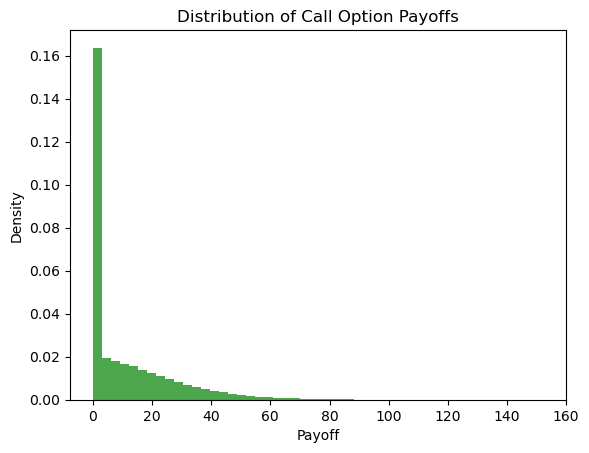

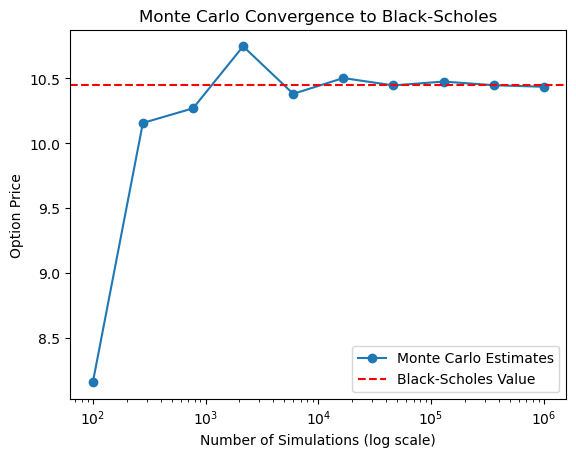

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from montecarlo import MonteCarloOption
from blackscholes import black_scholes

# Parameters
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2

# Monte Carlo Simulation
mc = MonteCarloOption(S0, K, T, r, sigma, n_sims=100000, seed=42)
ST = mc.simulate_price_paths()
call_payoffs = np.maximum(ST - K, 0)

# 1. Histogram of terminal stock prices
plt.hist(ST, bins=50, density=True, alpha=0.7)
plt.axvline(S0, color='red', linestyle='--', label="Initial Price")
plt.title("Simulated Terminal Stock Prices")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.show()

# 2. Histogram of call payoffs
plt.hist(call_payoffs, bins=50, density=True, alpha=0.7, color='green')
plt.title("Distribution of Call Option Payoffs")
plt.xlabel("Payoff")
plt.ylabel("Density")
plt.show()

# 3. Convergence plot
sim_counts = np.logspace(2, 6, num=10, dtype=int)  # from 100 to 1,000,000 sims
mc_estimates = []

for n in sim_counts:
    mc_temp = MonteCarloOption(S0, K, T, r, sigma, n_sims=n, seed=42)
    mc_estimates.append(mc_temp.price_european_call())

bs_value = black_scholes(S0, K, T, r, sigma, "call")

plt.plot(sim_counts, mc_estimates, marker='o', label="Monte Carlo Estimates")
plt.axhline(bs_value, color='red', linestyle='--', label="Black-Scholes Value")
plt.xscale("log")
plt.xlabel("Number of Simulations (log scale)")
plt.ylabel("Option Price")
plt.title("Monte Carlo Convergence to Black-Scholes")
plt.legend()
plt.show()


In [4]:
print(f"Monte Carlo Call Price: {mc_call:.4f}")
print(f"Black-Scholes Call Price: {bs_call:.4f}")
print(f"Monte Carlo Put Price: {mc_put:.4f}")
print(f"Black-Scholes Put Price: {bs_put:.4f}")


Monte Carlo Call Price: 10.4739
Black-Scholes Call Price: 10.4506
Monte Carlo Put Price: 5.5594
Black-Scholes Put Price: 5.5735
